# X All

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the ticker symbol for Gold
tick = 'GOTO.JK'

# Define the date range for which you want to retrieve data
start_date = '2022-04-10'
end_date = '2023-09-27'

# Retrieve daily data for Gold
stock_data = yf.download(tick, start=start_date, end=end_date)

# Reset the index to use the default integer index
stock_data.reset_index(inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       353 non-null    datetime64[ns]
 1   Open       353 non-null    float64       
 2   High       353 non-null    float64       
 3   Low        353 non-null    float64       
 4   Close      353 non-null    float64       
 5   Adj Close  353 non-null    float64       
 6   Volume     353 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.4 KB


In [ ]:
sentiment_goto = pd.read_csv("Sentimen GoTo Fix 2.csv")

In [ ]:
sentiment_goto.head()

,Date,Sentiment_Label,Sentiment_Score
0,2022-04-11,positive,0.586556
1,2022-04-12,positive,0.650707
2,2022-04-13,positive,0.488230
3,2022-04-14,neutral,0.000000
4,2022-04-15,neutral,0.000000


In [ ]:
sentiment_goto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             383 non-null    object 
 1   Sentiment_Label  383 non-null    object 
 2   Sentiment_Score  383 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.1+ KB


In [ ]:
# Ubah tipe data kolom tanggal (Date) pada sentiment_goto menjadi datetime64[ns]
sentiment_goto["Date"] = pd.to_datetime(sentiment_goto["Date"])

# Gabungkan data berdasarkan tanggal
combined_data = pd.merge(stock_data, sentiment_goto, on="Date", how="left")

In [ ]:
# Buat mapping dari label sentimen ke angka
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Ubah kolom 'Sentiment_Label' menjadi representasi angka
combined_data['Dummy_Sentiment'] = combined_data['Sentiment_Label'].map(sentiment_mapping)

In [ ]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000,positive,0.586556,2
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000,positive,0.650707,2
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400,positive,0.488230,2
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900,neutral,0.000000,1
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700,positive,0.508341,2


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             353 non-null    datetime64[ns]
 1   Open             353 non-null    float64       
 2   High             353 non-null    float64       
 3   Low              353 non-null    float64       
 4   Close            353 non-null    float64       
 5   Adj Close        353 non-null    float64       
 6   Volume           353 non-null    int64         
 7   Sentiment_Label  353 non-null    object        
 8   Sentiment_Score  353 non-null    float64       
 9   Dummy_Sentiment  353 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 30.3+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Ubah kolom "Date" menjadi indeks
combined_data.set_index('Date', inplace=True)

# Pisahkan fitur dan target
X = combined_data[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Sentiment_Score']]
y = combined_data['Close']

# Normalisasi data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Mengatur jumlah waktu (contoh: 5 hari)
time_steps = 5

# Bentuk ulang data latih dan data uji
X_train_reshaped = np.array([X_train[i:i+time_steps] for i in range(len(X_train) - time_steps + 1)])
X_test_reshaped = np.array([X_test[i:i+time_steps] for i in range(len(X_test) - time_steps + 1)])
y_train_reshaped = y_train[time_steps - 1:]
y_test_reshaped = y_test[time_steps - 1:]

# Membuat model GRU dengan bentuk input yang benar
model = Sequential()
model.add(GRU(50, input_shape=(time_steps, X_train.shape[1]), return_sequences=True))
model.add(GRU(50, return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
model.fit(X_train_reshaped, y_train_reshaped, epochs=15, batch_size=32)


Epoch 1/15
1/9 [==>...........................] - ETA: 1s - loss: 0.1973

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 1s 82ms/step - loss: 0.0594
Epoch 2/15
9/9 [==============================] - 1s 81ms/step - loss: 0.0123
Epoch 3/15
9/9 [==============================] - 1s 82ms/step - loss: 0.0065
Epoch 4/15
9/9 [==============================] - 1s 79ms/step - loss: 0.0044
Epoch 5/15
9/9 [==============================] - 1s 82ms/step - loss: 0.0032
Epoch 6/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0025
Epoch 7/15
9/9 [==============================] - 1s 78ms/step - loss: 0.0023
Epoch 8/15
9/9 [==============================] - 1s 77ms/step - loss: 0.0021
Epoch 9/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0020
Epoch 10/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0021
Epoch 11/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0020
Epoch 12/15
9/9 [==============================] - 1s 101ms/step - loss: 0.0020
Epoch 13/15
9/9 [==============================] - 1s 98ms/step - loss:

In [ ]:
train_loss = model.evaluate(X_train_reshaped, y_train_reshaped, verbose=0)
test_loss = model.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Training Loss: 0.0018328754231333733
Test Loss: 0.00012445707398001105


In [ ]:
y_train_pred = model.predict(X_train_reshaped)
y_test_pred = model.predict(X_test_reshaped)

# Inversi normalisasi untuk mendapatkan harga yang diprediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)


3/3 [==============================] - 0s 32ms/step


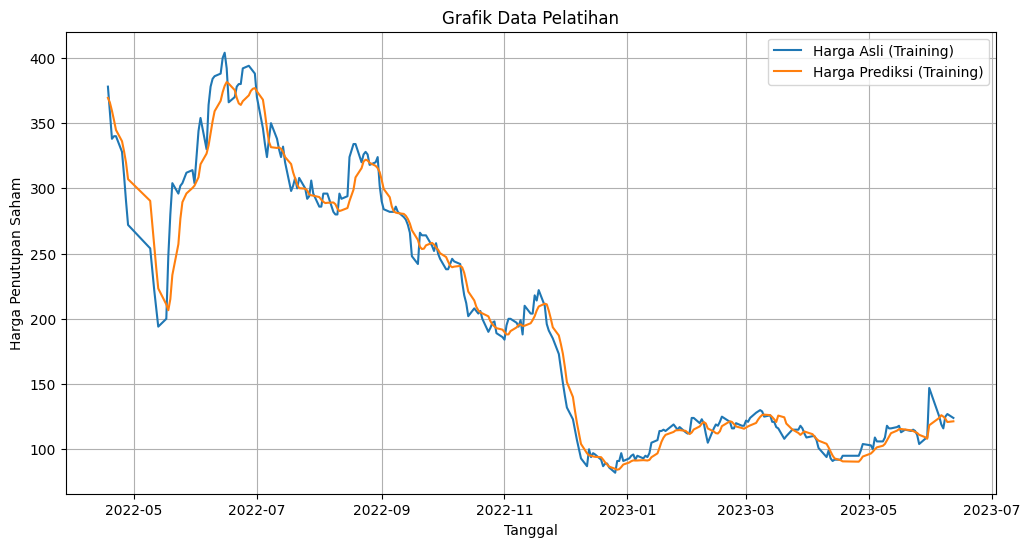

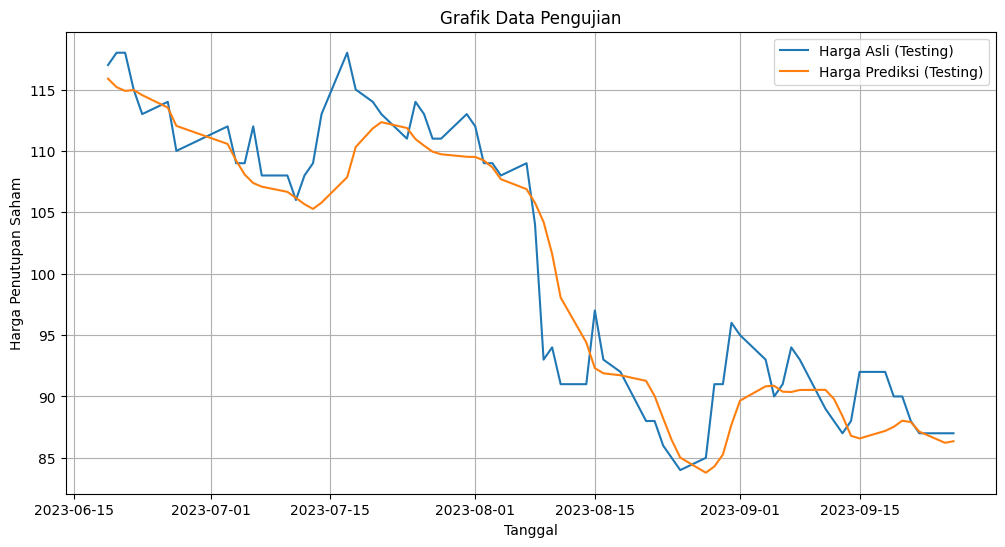

In [ ]:
import matplotlib.pyplot as plt

# Inversi normalisasi untuk mendapatkan harga yang asli
y_train_true = scaler.inverse_transform(y_train_reshaped)
y_test_true = scaler.inverse_transform(y_test_reshaped)

# Plot data pelatihan
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[time_steps - 1:len(y_train_true) + time_steps - 1], y_train_true, label='Harga Asli (Training)')
plt.plot(combined_data.index[time_steps - 1:len(y_train_pred) + time_steps - 1], y_train_pred, label='Harga Prediksi (Training)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Data Pelatihan')
plt.legend()
plt.grid()
plt.show()

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(combined_data.index[-len(y_test_pred):], y_test_pred, label='Harga Prediksi (Testing)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Data Pengujian')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Menghitung MAE
mae = mean_absolute_error(y_train_true, y_train_pred)

# Menghitung MAD (Mean Absolute Deviation)
mad = np.mean(np.abs(y_train_true - y_train_pred))

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train_true - y_train_pred) / y_train_true)) * 100

print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}%')


MAE: 9.395058446650882
MAD: 9.395058446650882
MAPE: 4.643401205611516%


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Menghitung MAE
mae = mean_absolute_error(y_test_true, y_test_pred)

# Menghitung MAD (Mean Absolute Deviation)
mad = np.mean(np.abs(y_test_true - y_test_pred))

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_true - y_test_pred) / y_test_true)) * 100

print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}%')


MAE: 2.624451480694672
MAD: 2.624451480694672
MAPE: 2.6426499840568733%


1/1 [==============================] - 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


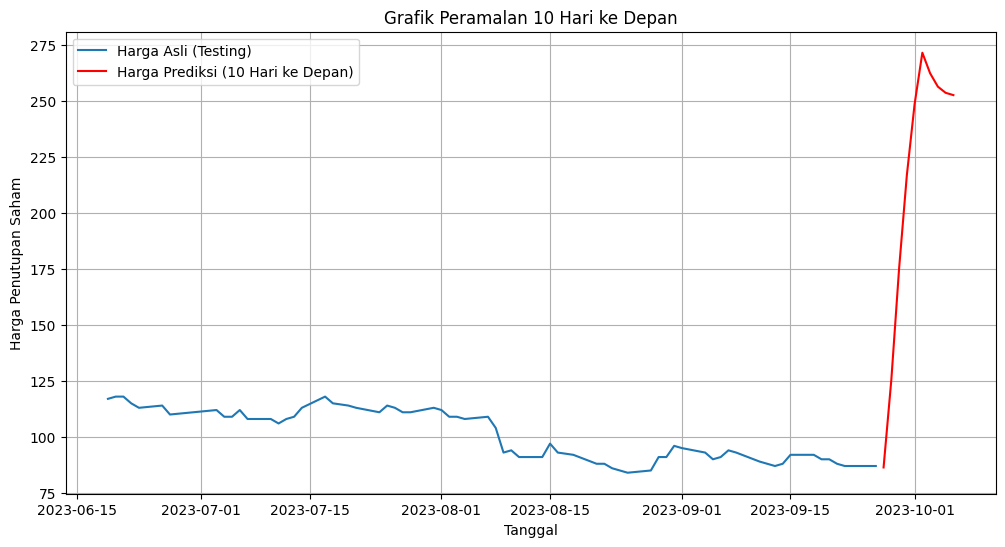

In [ ]:
from datetime import timedelta
# Ambil data terakhir dari data pengujian
last_sequence = X_test_reshaped[-1]

# Inisialisasi daftar kosong untuk menyimpan prediksi
forecasted_prices = []

# Lakukan peramalan 10 hari ke depan
for i in range(10):
    # Lakukan prediksi untuk harga 1 hari ke depan
    next_price = model.predict(np.array([last_sequence]))

    # Inversi normalisasi untuk mendapatkan harga yang asli
    next_price = scaler.inverse_transform(next_price)[0][0]

    # Tambahkan harga ke daftar prediksi
    forecasted_prices.append(next_price)

    # Update urutan data terakhir dengan harga yang diprediksi
    last_sequence = np.vstack((last_sequence[1:], [next_price, 0, 0, 0, 0, 0]))

# Buat indeks tanggal untuk prediksi 10 hari ke depan
last_date = combined_data.index[-1]

# Membuat rentang tanggal untuk 10 hari ke depan
forecasted_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(forecasted_dates, forecasted_prices, label='Harga Prediksi (10 Hari ke Depan)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Peramalan 10 Hari ke Depan')
plt.legend()
plt.grid()
plt.show()



1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 41ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


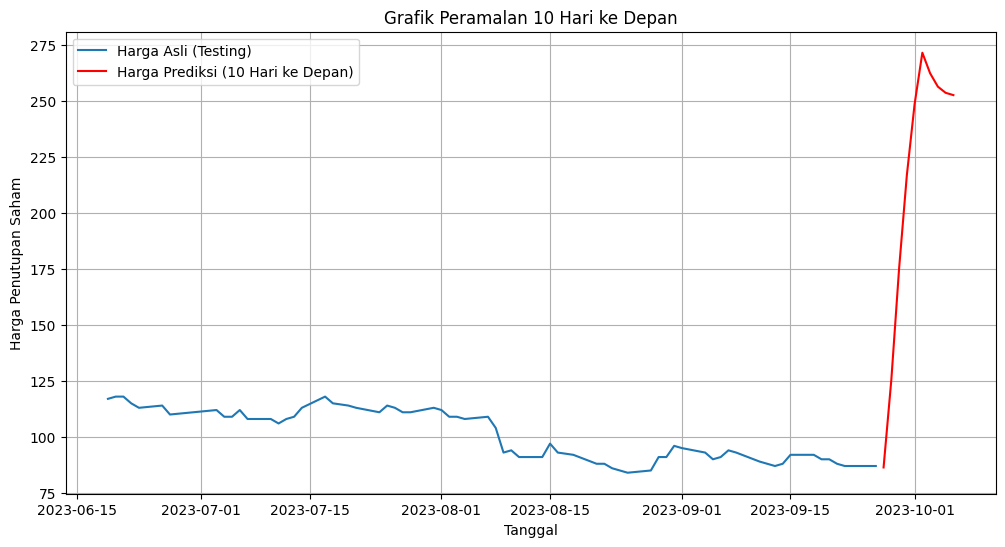

In [ ]:
from datetime import timedelta

# Ambil data terakhir dari data pengujian
last_sequence = X_test_reshaped[-1]

# Inisialisasi daftar kosong untuk menyimpan prediksi
forecasted_prices = []

# Lakukan peramalan 10 hari ke depan
for i in range(10):
    # Lakukan prediksi untuk harga 1 hari ke depan
    next_price = model.predict(np.array([last_sequence]))

    # Inversi normalisasi untuk mendapatkan harga yang asli
    next_price = scaler.inverse_transform(next_price)[0][0]

    # Tambahkan harga ke daftar prediksi
    forecasted_prices.append(next_price)

    # Update urutan data terakhir dengan harga yang diprediksi
    last_sequence = np.vstack((last_sequence[1:], [next_price, 0, 0, 0, 0, 0]))

# Buat indeks tanggal untuk prediksi 10 hari ke depan
last_date = combined_data.index[-1]
forecasted_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(forecasted_dates, forecasted_prices, label='Harga Prediksi (10 Hari ke Depan)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Peramalan 10 Hari ke Depan')
plt.legend()
plt.grid()
plt.show()


# X Sentimen

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the ticker symbol for Gold
tick = 'GOTO.JK'

# Define the date range for which you want to retrieve data
start_date = '2022-04-10'
end_date = '2023-09-27'

# Retrieve daily data for Gold
stock_data = yf.download(tick, start=start_date, end=end_date)

# Reset the index to use the default integer index
stock_data.reset_index(inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
sentiment_goto = pd.read_csv("Sentimen GoTo Fix 2.csv")

In [ ]:
# Ubah tipe data kolom tanggal (Date) pada sentiment_goto menjadi datetime64[ns]
sentiment_goto["Date"] = pd.to_datetime(sentiment_goto["Date"])

# Gabungkan data berdasarkan tanggal
combined_data = pd.merge(stock_data, sentiment_goto, on="Date", how="left")

In [ ]:
# Buat mapping dari label sentimen ke angka
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Ubah kolom 'Sentiment_Label' menjadi representasi angka
combined_data['Dummy_Sentiment'] = combined_data['Sentiment_Label'].map(sentiment_mapping)

In [ ]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000,positive,0.586556,2
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000,positive,0.650707,2
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400,positive,0.488230,2
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900,neutral,0.000000,1
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700,positive,0.508341,2


In [ ]:

# Membuat kolom baru untuk positive, negative, dan neutral
combined_data['positive'] = combined_data['Sentiment_Label'].apply(lambda x: 1 if x == 'positive' else 0)
combined_data['negative'] = combined_data['Sentiment_Label'].apply(lambda x: 1 if x == 'negative' else 0)
combined_data['neutral'] = combined_data['Sentiment_Label'].apply(lambda x: 1 if x == 'neutral' else 0)


In [ ]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment,positive,negative,neutral
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000,positive,0.586556,2,1,0,0
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000,positive,0.650707,2,1,0,0
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400,positive,0.488230,2,1,0,0
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900,neutral,0.000000,1,0,0,1
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700,positive,0.508341,2,1,0,0


In [ ]:
# Membuat lag 1 hari untuk variabel positive, negative, dan neutral
combined_data['positive_lag1'] = combined_data['positive'].shift(1)
combined_data['negative_lag1'] = combined_data['negative'].shift(1)
combined_data['neutral_lag1'] = combined_data['neutral'].shift(1)

# Membuat lag 3 hari untuk variabel Close
combined_data['close_lag3'] = combined_data['Close'].shift(3)

In [ ]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment,positive,negative,neutral,positive_lag1,negative_lag1,neutral_lag1,close_lag3
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000,positive,0.586556,2,1,0,0,NaN,NaN,NaN,NaN
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000,positive,0.650707,2,1,0,0,1.0,0.0,0.0,NaN
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400,positive,0.488230,2,1,0,0,1.0,0.0,0.0,NaN
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900,neutral,0.000000,1,0,0,1,1.0,0.0,0.0,382.0
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700,positive,0.508341,2,1,0,0,0.0,0.0,1.0,370.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Ubah kolom "Date" menjadi indeks
combined_data.set_index('Date', inplace=True)

# Pisahkan fitur dan target
X = combined_data[['Adj Close', 'positive', 'negative', 'neutral']]
y = combined_data['Close']

# Normalisasi data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Mengatur jumlah waktu (contoh: 5 hari)
time_steps = 5

# Bentuk ulang data latih dan data uji
X_train_reshaped = np.array([X_train[i:i+time_steps] for i in range(len(X_train) - time_steps + 1)])
X_test_reshaped = np.array([X_test[i:i+time_steps] for i in range(len(X_test) - time_steps + 1)])
y_train_reshaped = y_train[time_steps - 1:]
y_test_reshaped = y_test[time_steps - 1:]

# Membuat model GRU dengan bentuk input yang benar
model = Sequential()
model.add(GRU(50, input_shape=(time_steps, X_train.shape[1]), return_sequences=True))
model.add(GRU(50, return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
model.fit(X_train_reshaped, y_train_reshaped, epochs=15, batch_size=32)


Epoch 1/15
1/9 [==>...........................] - ETA: 0s - loss: 0.1919

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 1s 84ms/step - loss: 0.0997
Epoch 2/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0422
Epoch 3/15
9/9 [==============================] - 1s 81ms/step - loss: 0.0125
Epoch 4/15
9/9 [==============================] - 1s 84ms/step - loss: 0.0044
Epoch 5/15
9/9 [==============================] - 1s 79ms/step - loss: 0.0034
Epoch 6/15
9/9 [==============================] - 1s 97ms/step - loss: 0.0021
Epoch 7/15
9/9 [==============================] - 1s 94ms/step - loss: 0.0020
Epoch 8/15
9/9 [==============================] - 1s 101ms/step - loss: 0.0018
Epoch 9/15
9/9 [==============================] - 1s 81ms/step - loss: 0.0016
Epoch 10/15
9/9 [==============================] - 1s 82ms/step - loss: 0.0018
Epoch 11/15
9/9 [==============================] - 1s 80ms/step - loss: 0.0016
Epoch 12/15
9/9 [==============================] - 1s 77ms/step - loss: 0.0016
Epoch 13/15
9/9 [==============================] - 1s 82ms/step - loss:

In [ ]:
train_loss = model.evaluate(X_train_reshaped, y_train_reshaped, verbose=0)
test_loss = model.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Training Loss: 0.001587600912898779
Test Loss: 0.0005695743602700531


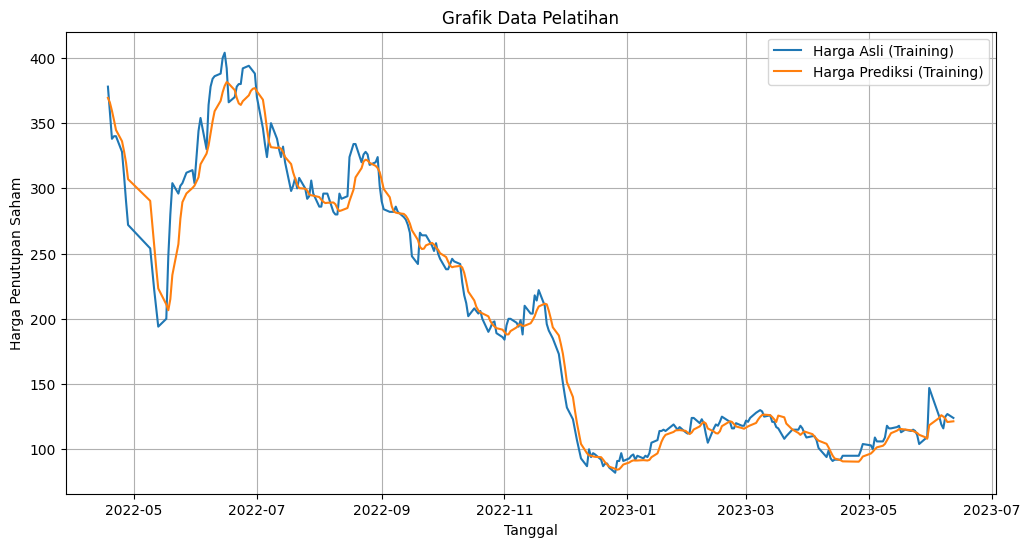

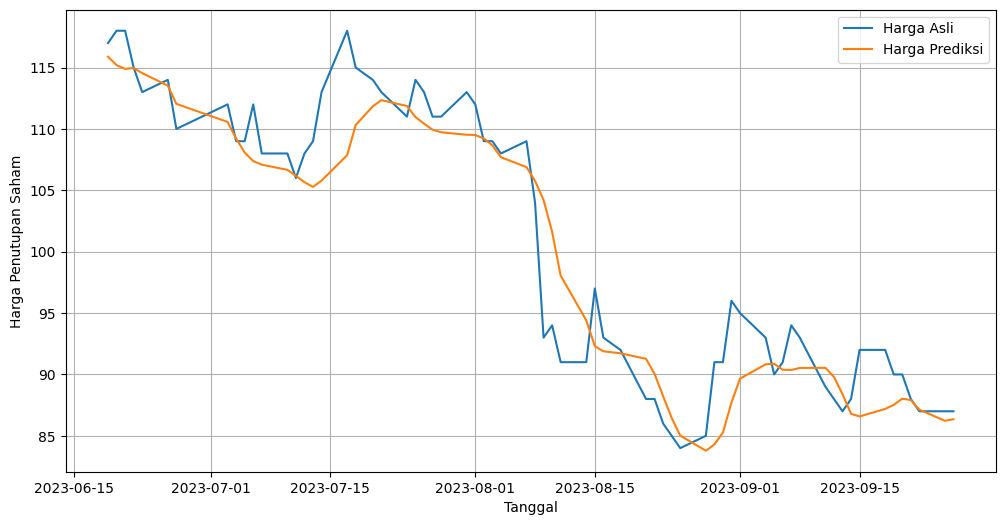

In [ ]:
import matplotlib.pyplot as plt

# Inversi normalisasi untuk mendapatkan harga yang asli
y_train_true = scaler.inverse_transform(y_train_reshaped)
y_test_true = scaler.inverse_transform(y_test_reshaped)

# Plot data pelatihan
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[time_steps - 1:len(y_train_true) + time_steps - 1], y_train_true, label='Harga Asli (Training)')
plt.plot(combined_data.index[time_steps - 1:len(y_train_pred) + time_steps - 1], y_train_pred, label='Harga Prediksi (Training)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Data Pelatihan')
plt.legend()
plt.grid()
plt.show()

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli')
plt.plot(combined_data.index[-len(y_test_pred):], y_test_pred, label='Harga Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Menghitung MAE
mae = mean_absolute_error(y_test_true, y_test_pred)

# Menghitung MAD (Mean Absolute Deviation)
mad = np.mean(np.abs(y_test_true - y_test_pred))

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_true - y_test_pred) / y_test_true)) * 100

print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}%')


MAE: 2.624451480694672
MAD: 2.624451480694672
MAPE: 2.6426499840568733%


1/1 [==============================] - 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


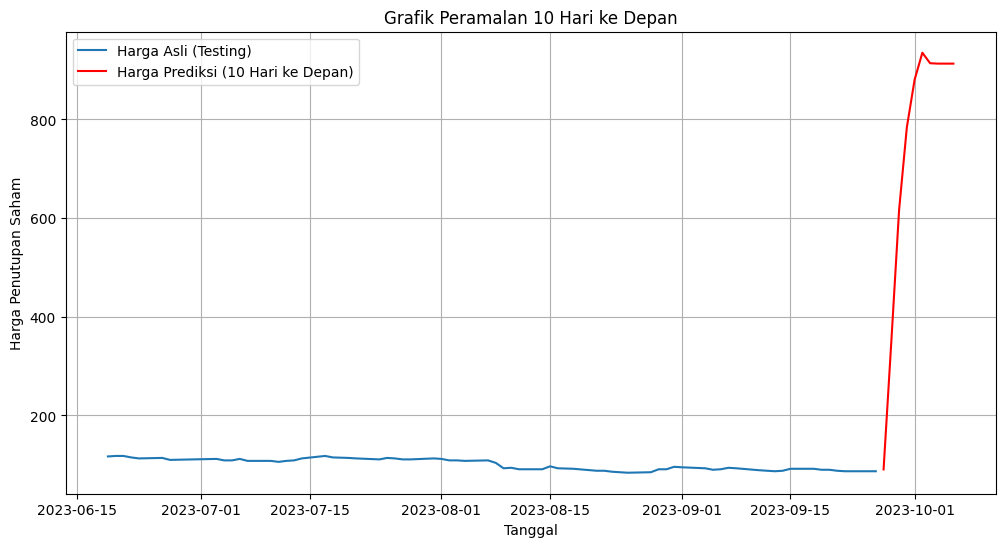

In [ ]:
from datetime import timedelta

# Ambil data terakhir dari data pengujian
last_sequence = X_test_reshaped[-1]

# Inisialisasi daftar kosong untuk menyimpan prediksi
forecasted_prices = []

# Lakukan peramalan 10 hari ke depan
for i in range(10):
    # Lakukan prediksi untuk harga 1 hari ke depan
    next_price = model.predict(np.array([last_sequence]))

    # Inversi normalisasi untuk mendapatkan harga yang asli
    next_price = scaler.inverse_transform(next_price)[0][0]

    # Tambahkan harga ke daftar prediksi
    forecasted_prices.append(next_price)

    # Update urutan data terakhir dengan harga yang diprediksi
    last_sequence = np.vstack((last_sequence[1:], [next_price, 0, 0, 0]))

# Buat indeks tanggal untuk prediksi 10 hari ke depan
last_date = combined_data.index[-1]
forecasted_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(forecasted_dates, forecasted_prices, label='Harga Prediksi (10 Hari ke Depan)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Peramalan 10 Hari ke Depan')
plt.legend()
plt.grid()
plt.show()


1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


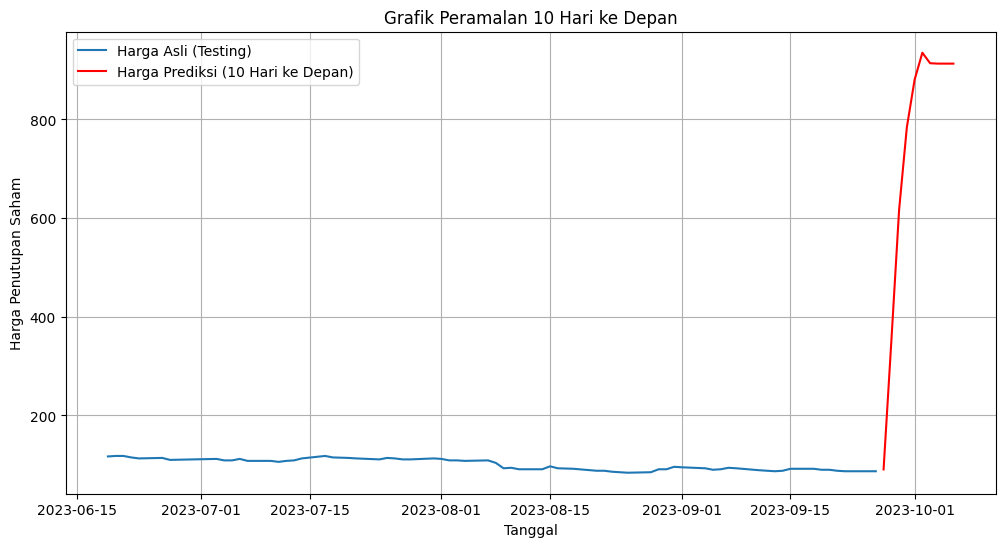

In [ ]:
from datetime import timedelta

# Ambil data terakhir dari data pengujian
last_sequence = X_test_reshaped[-1]

# Inisialisasi daftar kosong untuk menyimpan prediksi
forecasted_prices = []

# Lakukan peramalan 10 hari ke depan
for i in range(10):
    # Pastikan last_sequence memiliki dimensi yang benar
    last_sequence_reshaped = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Lakukan prediksi untuk harga 1 hari ke depan
    next_price = model.predict(last_sequence_reshaped)

    # Inversi normalisasi untuk mendapatkan harga yang asli
    next_price = scaler.inverse_transform(next_price.reshape(1, -1))[0][0]

    # Tambahkan harga ke daftar prediksi
    forecasted_prices.append(next_price)

    # Update urutan data terakhir dengan harga yang diprediksi
    last_sequence = np.vstack((last_sequence[1:], np.array([[next_price, 0, 0, 0]])))

# Buat indeks tanggal untuk prediksi 10 hari ke depan
last_date = combined_data.index[-1]
forecasted_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(forecasted_dates, forecasted_prices, label='Harga Prediksi (10 Hari ke Depan)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Peramalan 10 Hari ke Depan')
plt.legend()
plt.grid()
plt.show()


1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  next_price = scaler.inverse_transform(np.array([[next_price, 0, 0, 0, 0, 0, 0, 0]]))[0][0]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager 

1/1 [==============================] - 0s 41ms/step


<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  next_price = scaler.inverse_transform(np.array([[next_price, 0, 0, 0, 0, 0, 0, 0]]))[0][0]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

1/1 [==============================] - 0s 42ms/step


<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  next_price = scaler.inverse_transform(np.array([[next_price, 0, 0, 0, 0, 0, 0, 0]]))[0][0]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

1/1 [==============================] - 0s 40ms/step


<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  next_price = scaler.inverse_transform(np.array([[next_price, 0, 0, 0, 0, 0, 0, 0]]))[0][0]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
<ipython-input-320-13ae0874be0e>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

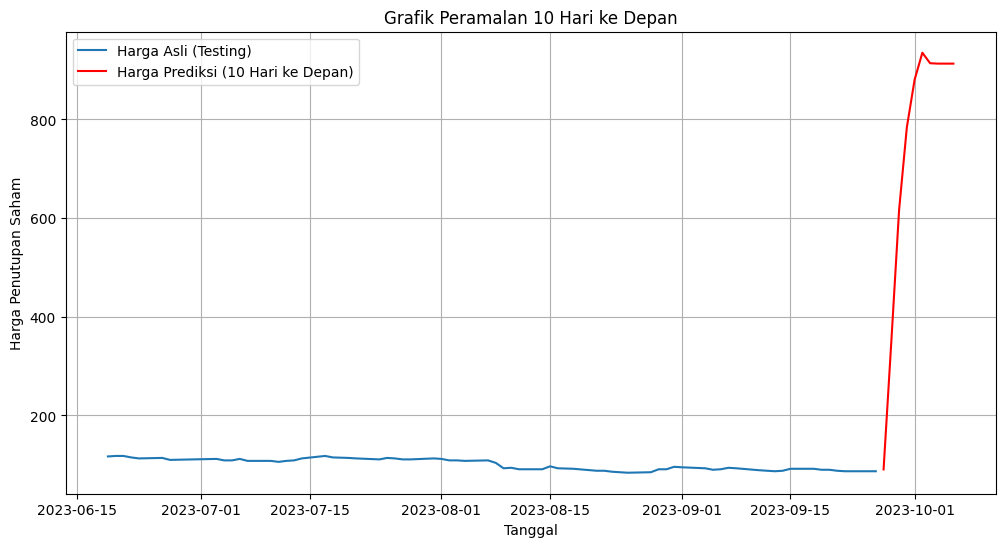

In [ ]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Ambil data terakhir dari data pengujian
last_sequence = X_test_reshaped[-1]

# Inisialisasi daftar kosong untuk menyimpan prediksi
forecasted_prices = []

# Lakukan peramalan 10 hari ke depan
for i in range(10):
    # Pastikan last_sequence memiliki dimensi yang benar
    last_sequence_reshaped = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Lakukan prediksi untuk harga 1 hari ke depan
    next_price = model.predict(last_sequence_reshaped)

    # Inversi normalisasi untuk mendapatkan harga yang asli
    next_price = scaler.inverse_transform(np.array([[next_price, 0, 0, 0, 0, 0, 0, 0]]))[0][0]

    # Tambahkan harga ke daftar prediksi
    forecasted_prices.append(next_price)

    # Update urutan data terakhir dengan harga yang diprediksi
    last_sequence = np.vstack((last_sequence[1:], np.array([[next_price, 0, 0,0]])))

# Buat indeks tanggal untuk prediksi 10 hari ke depan
last_date = combined_data.index[-1]
forecasted_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index[-len(y_test_true):], y_test_true, label='Harga Asli (Testing)')
plt.plot(forecasted_dates, forecasted_prices, label='Harga Prediksi (10 Hari ke Depan)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan Saham')
plt.title('Grafik Peramalan 10 Hari ke Depan')
plt.legend()
plt.grid()
plt.show()


# coba lag

In [ ]:
combined_data.head()

,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment,positive,negative,neutral,positive_lag1,negative_lag1,neutral_lag1,close_lag3
Date,,,,,,,,,,,,,,,,
2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000,positive,0.586556,2,1,0,0,NaN,NaN,NaN,NaN
2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000,positive,0.650707,2,1,0,0,1.0,0.0,0.0,NaN
2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400,positive,0.488230,2,1,0,0,1.0,0.0,0.0,NaN
2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900,neutral,0.000000,1,0,0,1,1.0,0.0,0.0,382.0
2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700,positive,0.508341,2,1,0,0,0.0,0.0,1.0,370.0


In [ ]:
df = combined_data

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Sentiment_Label,Sentiment_Score,Dummy_Sentiment,positive,negative,neutral,positive_lag1,negative_lag1,neutral_lag1,close_lag3
Date,,,,,,,,,,,,,,,,
2023-09-20,90.0,93.0,90.0,90.0,90.0,1687125100,neutral,0.000000,1,0,0,1,0.0,0.0,1.0,92.0
2023-09-21,90.0,91.0,87.0,88.0,88.0,1530818800,positive,0.580695,2,1,0,0,0.0,0.0,1.0,92.0
2023-09-22,88.0,90.0,87.0,87.0,87.0,1058373800,neutral,0.000000,1,0,0,1,1.0,0.0,0.0,90.0
2023-09-25,88.0,89.0,87.0,87.0,87.0,1603642100,positive,0.539287,2,1,0,0,0.0,0.0,1.0,90.0
2023-09-26,91.0,92.0,87.0,87.0,87.0,5154826100,positive,0.541779,2,1,0,0,1.0,0.0,0.0,88.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2022-04-11 to 2023-09-26
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             353 non-null    float64
 1   High             353 non-null    float64
 2   Low              353 non-null    float64
 3   Close            353 non-null    float64
 4   Adj Close        353 non-null    float64
 5   Volume           353 non-null    int64  
 6   Sentiment_Label  353 non-null    object 
 7   Sentiment_Score  353 non-null    float64
 8   Dummy_Sentiment  353 non-null    int64  
 9   positive         353 non-null    int64  
 10  negative         353 non-null    int64  
 11  neutral          353 non-null    int64  
 12  positive_lag1    352 non-null    float64
 13  negative_lag1    352 non-null    float64
 14  neutral_lag1     352 non-null    float64
 15  close_lag3       350 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory 

In [ ]:
#df.reset_index(inplace=True)
#df.sort_values('Date', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2022-04-11 to 2023-09-26
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             353 non-null    float64
 1   High             353 non-null    float64
 2   Low              353 non-null    float64
 3   Close            353 non-null    float64
 4   Adj Close        353 non-null    float64
 5   Volume           353 non-null    int64  
 6   Sentiment_Label  353 non-null    object 
 7   Sentiment_Score  353 non-null    float64
 8   Dummy_Sentiment  353 non-null    int64  
 9   positive         353 non-null    int64  
 10  negative         353 non-null    int64  
 11  neutral          353 non-null    int64  
 12  positive_lag1    352 non-null    float64
 13  negative_lag1    352 non-null    float64
 14  neutral_lag1     352 non-null    float64
 15  close_lag3       350 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Set seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)
tf.config.run_functions_eagerly(True)

# Drop rows with NaN values
df = df.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'Volume', 'Sentiment_Score']])

# Create lag features
for i in range(1, 4):
    df[f'close_lag{i}'] = df['Close'].shift(i)
    df[f'sentiment_lag{i}'] = df['Sentiment_Score'].shift(i)

# Drop rows with NaN values
df = df.dropna()

# Prepare input features and target variable
X = df[['Close','close_lag1', 'positive', 'negative', 'neutral', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
y = df['Close'].values

# Reshape input features for GRU
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, batch_size=16, validation_split=0.2, shuffle=False)

# Set seed for reproducibility in model training
tf.random.set_seed(100)

# Make predictions for the next 10 days
last_data = df.tail(1)[['Close','close_lag1', 'positive', 'negative', 'neutral', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
last_data = last_data.reshape((1, 1, last_data.shape[1]))

predictions = []
for i in range(10):
    prediction = model.predict(last_data)
    predictions.append(prediction[0, 0])

    # Corrected code for appending
    new_data = np.array([[prediction[0, 0], df['Sentiment_Score'].values[-1], df['Sentiment_Score'].values[-2]]])
    new_data = new_data.reshape((1, 1, new_data.shape[1]))

    last_data = np.concatenate((last_data[:, :, 0:3], new_data), axis=2)

# Inverse transform the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], 2)), predictions)))

# Print the predictions
print("Predictions for the next 10 days:", predictions[:, -1])

# Plotting the predicted values for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(predictions[:, -1], label='Predicted', marker='o', color='orange')
plt.title('Forecasted Close Prices for the Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Epoch 1/10


<ipython-input-327-14dc606e2ae8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'close_lag{i}'] = df['Close'].shift(i)
<ipython-input-327-14dc606e2ae8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'sentiment_lag{i}'] = df['Sentiment_Score'].shift(i)
<ipython-input-327-14dc606e2ae8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

18/18 [==============================] - 1s 36ms/step - loss: 48118.2344 - val_loss: 7616.0332
Epoch 2/10
18/18 [==============================] - 1s 34ms/step - loss: 32556.9141 - val_loss: 4659.1855
Epoch 3/10
18/18 [==============================] - 1s 35ms/step - loss: 19628.0547 - val_loss: 2584.7378
Epoch 4/10
18/18 [==============================] - 1s 37ms/step - loss: 10845.8496 - val_loss: 1303.3799
Epoch 5/10
18/18 [==============================] - 1s 28ms/step - loss: 4908.4648 - val_loss: 442.0666
Epoch 6/10
18/18 [==============================] - 0s 27ms/step - loss: 1629.1127 - val_loss: 118.4836
Epoch 7/10
18/18 [==============================] - 0s 27ms/step - loss: 420.8102 - val_loss: 18.5331
Epoch 8/10
18/18 [==============================] - 1s 28ms/step - loss: 75.8933 - val_loss: 1.9267
Epoch 9/10
18/18 [==============================] - 1s 29ms/step - loss: 24.5692 - val_loss: 1.6656
Epoch 10/10
1/1 [==============================] - 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored

#hmm


Epoch 1/15
3/9 [=========>....................] - ETA: 0s - loss: 135648.2031

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 0s 46ms/step - loss: 65649.2891 - val_loss: 12346.1865
Epoch 2/15
9/9 [==============================] - 0s 38ms/step - loss: 57044.9297 - val_loss: 10642.9893
Epoch 3/15
9/9 [==============================] - 0s 39ms/step - loss: 48799.0391 - val_loss: 9272.1748
Epoch 4/15
9/9 [==============================] - 0s 36ms/step - loss: 42783.2109 - val_loss: 8126.6968
Epoch 5/15
9/9 [==============================] - 0s 28ms/step - loss: 37608.4844 - val_loss: 6666.1680
Epoch 6/15
9/9 [==============================] - 0s 34ms/step - loss: 30141.6699 - val_loss: 5590.1621
Epoch 7/15
9/9 [==============================] - 0s 29ms/step - loss: 25774.3535 - val_loss: 4079.3628
Epoch 8/15
9/9 [==============================] - 0s 28ms/step - loss: 17922.8809 - val_loss: 2867.9609
Epoch 9/15
9/9 [==============================] - 0s 32ms/step - loss: 13093.6953 - val_loss: 1354.8274
Epoch 10/15
9/9 [==============================] - 0s 31ms/step - loss: 5

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Predictions for the next 10 days: [72.14224066 84.33169468 84.33169468 84.33169468 84.33169468 84.33169468
 84.33169468 84.33169468 84.33169468 84.33169468]


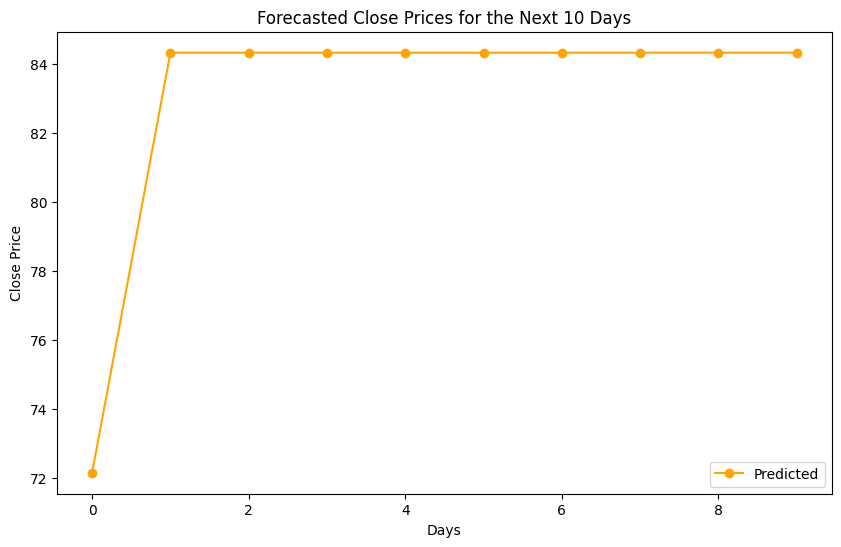

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Drop rows with NaN values
df = df.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'Volume', 'Sentiment_Score']])

# Create lag features
for i in range(1, 4):
    df[f'close_lag{i}'] = df['Close'].shift(i)
    df[f'sentiment_lag{i}'] = df['Sentiment_Score'].shift(i)

# Drop rows with NaN values
df = df.dropna()

# Prepare input features and target variable
X = df[['close_lag1', 'close_lag2', 'close_lag3', 'positive', 'negative', 'neutral', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
y = df['Close'].values

# Reshape input features for GRU
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=15, batch_size=32, validation_split=0.2, shuffle=False)

# Make predictions for the next 10 days
last_data = df.tail(1)[['close_lag1', 'close_lag2','close_lag3', 'positive', 'negative', 'neutral', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
last_data = last_data.reshape((1, 1, last_data.shape[1]))

predictions = []
for i in range(10):
    prediction = model.predict(last_data)
    predictions.append(prediction[0, 0])

    # Corrected code for appending
    new_data = np.array([[prediction[0, 0], df['Sentiment_Score'].values[-1], df['positive'].values[-1], df['negative'].values[-1], df['neutral'].values[-1], df['close_lag1'].values[-1], df['positive_lag1'].values[-1], df['negative_lag1'].values[-1], df['neutral_lag1'].values[-1]]])
    new_data = new_data.reshape((1, 1, new_data.shape[1]))

    last_data = np.concatenate((last_data[:, :, 0:3], new_data[:, :, 3:]), axis=2)

# Inverse transform the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], 2)), predictions)))

# Print the predictions
print("Predictions for the next 10 days:", predictions[:, -1])

# Plotting the predicted values for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(predictions[:, -1], label='Predicted', marker='o', color='orange')
plt.title('Forecasted Close Prices for the Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 58256.1836 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 0s 42ms/step - loss: 58256.1836 - val_loss: 13087.5615
Epoch 2/30
4/4 [==============================] - 0s 33ms/step - loss: 53704.8594 - val_loss: 12070.0137
Epoch 3/30
4/4 [==============================] - 0s 39ms/step - loss: 49407.2461 - val_loss: 11156.1699
Epoch 4/30
4/4 [==============================] - 0s 34ms/step - loss: 45210.0391 - val_loss: 10302.0635
Epoch 5/30
4/4 [==============================] - 0s 34ms/step - loss: 41743.3789 - val_loss: 9537.1094
Epoch 6/30
4/4 [==============================] - 0s 35ms/step - loss: 38750.9648 - val_loss: 8824.2910
Epoch 7/30
4/4 [==============================] - 0s 34ms/step - loss: 35985.2383 - val_loss: 8132.2920
Epoch 8/30
4/4 [==============================] - 0s 37ms/step - loss: 33203.8828 - val_loss: 7416.7471
Epoch 9/30
4/4 [==============================] - 0s 32ms/step - loss: 30375.5488 - val_loss: 6602.1787
Epoch 10/30
4/4 [==============================] - 0s 38ms/step - loss:

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Predictions for the next 10 days: [70.5832119  64.15914983 66.8692605  65.78265254 66.24844695 66.05030699
 66.1348904  66.09882367 66.11421504 66.10765446]


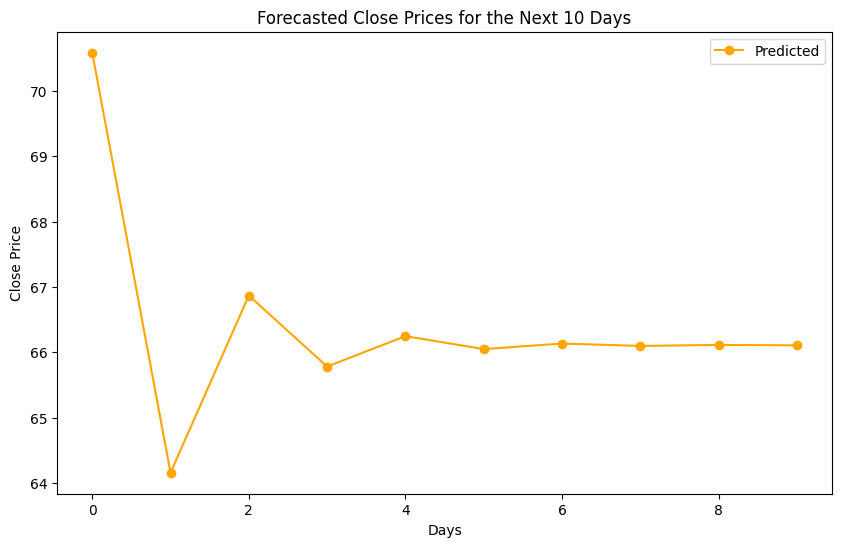

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
tf.config.run_functions_eagerly(True)

# Assuming df is your DataFrame with the provided structure
# Drop rows with NaN values
df = df.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'Volume', 'Sentiment_Score']])

# Create lag features
for i in range(1, 4):
    df[f'close_lag{i}'] = df['Close'].shift(i)
    df[f'sentiment_lag{i}'] = df['Sentiment_Score'].shift(i)

# Drop rows with NaN values
df = df.dropna()

# Prepare input features and target variable
X = df[['close_lag1', 'close_lag2', 'close_lag3', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
y = df['Close'].values

# Reshape input features for GRU
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Set seed for reproducibility in model training
tf.random.set_seed(42)

# Train the model
model.fit(X, y, epochs=30, batch_size=64, validation_split=0.2, shuffle=False)

# Make predictions for the next 10 days
last_data = df.tail(1)[['close_lag1', 'close_lag2', 'close_lag3','sentiment_lag1', 'sentiment_lag2', 'sentiment_lag3']].values
last_data = last_data.reshape((1, 1, last_data.shape[1]))

predictions = []
for i in range(10):
    prediction = model.predict(last_data)
    predictions.append(prediction[0, 0])

    # Corrected code for appending
    new_data = np.array([[prediction[0, 0], df['Sentiment_Score'].values[-1], df['Sentiment_Score'].values[-2]]])
    new_data = new_data.reshape((1, 1, new_data.shape[1]))

    last_data = np.concatenate((last_data[:, :, 0:3], new_data), axis=2)

# Inverse transform the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], 2)), predictions)))

# Print the predictions
print("Predictions for the next 10 days:", predictions[:, -1])

# Plotting the predicted values for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(predictions[:, -1], label='Predicted', marker='o', color='orange')
plt.title('Forecasted Close Prices for the Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


17/17 [==============================] - 1s 52ms/step - loss: 47069.7617 - val_loss: 8038.5757
Epoch 2/20
17/17 [==============================] - 1s 52ms/step - loss: 34589.5898 - val_loss: 5759.3662
Epoch 3/20
17/17 [==============================] - 1s 51ms/step - loss: 24141.3203 - val_loss: 2646.1428
Epoch 4/20
17/17 [==============================] - 1s 78ms/step - loss: 10192.7432 - val_loss: 268.4157
Epoch 5/20
17/17 [==============================] - 1s 37ms/step - loss: 713.6731 - val_loss: 12.1119
Epoch 6/20
17/17 [==============================] - 1s 35ms/step - loss: 114.5457 - val_loss: 15.8691
Epoch 7/20
17/17 [==============================] - 0s 28ms/step - loss: 119.4470 - val_loss: 12.1968
Epoch 8/20
17/17 [==============================] - 0s 26ms/step - loss: 106.2319 - val_loss: 11.4325
Epoch 9/20
17/17 [==============================] - 0s 29ms/step - loss: 105.9681 - val_loss: 11.4279
Epoch 10/20
17/17 [==============================] - 0s 28ms/step - loss: 106.

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Predictions for the next 10 days: [74.5852957  51.07648668 62.41561552 57.96462899 60.18970441 59.15860801
 59.65794889 59.42070209 59.5345087  59.48015527]


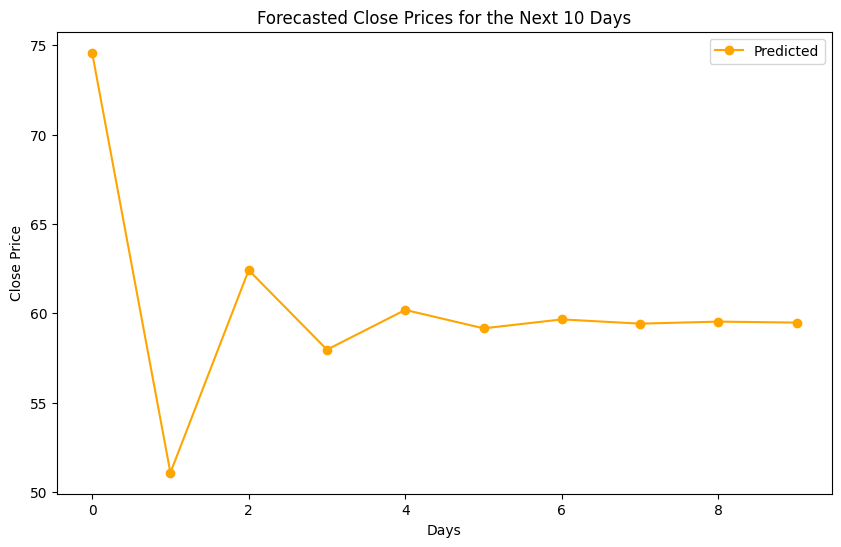

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
tf.config.run_functions_eagerly(True)

# Assuming df is your DataFrame with the provided structure
# Drop rows with NaN values
df = df.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'Volume', 'Sentiment_Score']])

# Create lag features
for i in range(1, 4):
    df[f'close_lag{i}'] = df['Close'].shift(i)
    df[f'sentiment_lag{i}'] = df['Sentiment_Score'].shift(i)

# Drop rows with NaN values
df = df.dropna()

# Prepare input features and target variable
X = df[['close_lag1', 'close_lag2', 'close_lag3', 'positive_lag1', 'negative_lag1', 'neutral_lag1']].values
y = df['Close'].values

# Reshape input features for GRU
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(units=40, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Set seed for reproducibility in model training
tf.random.set_seed(42)

# Train the model
model.fit(X, y, epochs=20, batch_size=16, validation_split=0.2, shuffle=False)

# Make predictions for the next 10 days
last_data = df.tail(1)[['close_lag1', 'close_lag2', 'close_lag3', 'sentiment_lag1', 'sentiment_lag2', 'sentiment_lag3']].values
last_data = last_data.reshape((1, 1, last_data.shape[1]))

predictions = []
for i in range(10):
    prediction = model.predict(last_data)
    predictions.append(prediction[0, 0])

    # Corrected code for appending
    new_data = np.array([[prediction[0, 0], df['Sentiment_Score'].values[-1], df['Sentiment_Score'].values[-2]]])
    new_data = new_data.reshape((1, 1, new_data.shape[1]))

    last_data = np.concatenate((last_data[:, :, 0:3], new_data), axis=2)

# Inverse transform the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], 2)), predictions)))

# Print the predictions
print("Predictions for the next 10 days:", predictions[:, -1])

# Plotting the predicted values for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(predictions[:, -1], label='Predicted', marker='o', color='orange')
plt.title('Forecasted Close Prices for the Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
